In [1]:
import GLPE

import numpy as np

from matplotlib import pyplot as plt

import pandas

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

* The data is a small sample from the the GSE 73072 dataset (from NCBI).
* Reactome Pathway Database to determine pathway membership and networks. 
* R package graphite to generate pathway networks with edges.

Contact nathan.mankovich@gmail.com for more information regarding the example data.

Load the data and normalize it.

In [2]:

ds = pandas.read_csv('../data/gse73072_4to2_9_16_subjectID_limma_test.csv', index_col = 'SampleID')
ds = pandas.DataFrame(data = StandardScaler().fit_transform(ds), index = ds.index, columns = ds.columns)

subject_ids = np.array(ds.index)


metadata = pandas.read_csv('../data/gse73072_metadata.csv', index_col = 0)
labels = metadata.loc[subject_ids]['4to2_9_16_test']
labels = labels != 'control'

ds.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
SampleID,,,,,,,,,,,,,,,,,,,,,
GSM1883444,-1.943648,-0.395996,0.338166,-1.656706,-1.138505,-1.883259,1.777784,-1.922068,-0.641514,-0.076627,...,-0.306794,-0.218273,-0.528874,-0.821310,-1.399718,-0.149125,0.291154,-0.177409,-1.538723,0.240116
GSM1883445,1.943648,0.395996,-0.338166,1.656706,1.138505,1.883259,-1.777784,1.922068,0.641514,0.076627,...,0.306794,0.218273,0.528874,0.821310,1.399718,0.149125,-0.291154,0.177409,1.538723,-0.240116
GSM1883463,-1.436357,0.061583,1.017895,-1.000333,0.681637,0.084130,1.636568,0.412668,-0.831313,-0.421505,...,-0.152611,0.087043,-0.224366,-0.320108,0.801790,0.960025,-0.464048,1.099370,-0.546082,-0.019655
GSM1883464,1.436357,-0.061583,-1.017895,1.000333,-0.681637,-0.084130,-1.636568,-0.412668,0.831313,0.421505,...,0.152611,-0.087043,0.224366,0.320108,-0.801790,-0.960025,0.464048,-1.099370,0.546082,0.019655
GSM1883482,-0.333881,-0.347623,-0.206484,0.006298,-0.767126,-0.509758,-0.017498,0.130597,-0.056278,-0.387759,...,-0.025402,-0.100490,-0.220739,-0.133690,0.395917,0.655182,-0.079819,0.904128,0.239293,0.864048


Visualize the data using PCA

Text(0.5, 1.0, 'PCA of Gene Expression Data')

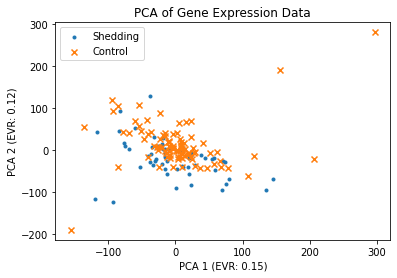

In [3]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])
pca_data = pipeline.fit_transform(ds)


plt.scatter(pca_data[labels,0], pca_data[labels,1], label = 'Shedding', marker = '.')
plt.scatter(pca_data[~labels,0], pca_data[~labels,1], label = 'Control', marker = 'x')

evr1 = round(pipeline['pca'].explained_variance_ratio_[0],2)
evr2 = round(pipeline['pca'].explained_variance_ratio_[1],2)

plt.xlabel(f'PCA 1 (EVR: {evr1})')
plt.ylabel(f'PCA 2 (EVR: {evr2})')
plt.legend()
plt.title('PCA of Gene Expression Data')

## Compute CPE (Centrality Pathway Expression)

* The options for centrality measure are: 'page_rank' and 'degree'
* The options for network type are: 'precomputed' and 'correlation'
* The options for directed are True or False (only for precomputed). Correlation edges are always undirected.


In [4]:
clpe = GLPE.CLPE(centrality_measure = 'degree', 
                    network_type = 'precomputed',
                    feature_ids = list(ds.columns),
                    pathway_files = '../data/pw_edge_mtx',
                    directed = True,
                    normalize_rows = True)



Run CPE

In [5]:
cpe_pipeline  = Pipeline([('scaling', StandardScaler()), ('cpe', clpe)])
cpe_pipeline.fit(ds)




Pipeline(steps=[('scaling', StandardScaler()),
                ('cpe',
                 CLPE(centrality_measure='degree', directed=True,
                      feature_ids=['1007_s_at', '1053_at', '117_at', '121_at',
                                   '1255_g_at', '1294_at', '1316_at', '1320_at',
                                   '1405_i_at', '1431_at', '1438_at', '1487_at',
                                   '1494_f_at', '1598_g_at', '160020_at',
                                   '1729_at', '177_at', '1773_at', '179_at',
                                   '1861_at', '200000_s_at', '200001_at',
                                   '200002_at', '200003_s_at', '200004_at',
                                   '200005_at', '200006_at', '200007_at',
                                   '200008_s_at', '200009_at', ...],
                      heat_kernel_param=2.0, network_type='precomputed',
                      pathway_files='../data/pw_edge_mtx',
                      pathway_transition_matrix=<75x22277 sparse matrix of type '<class 'numpy.float64'>'
	with 2801 stored elements in Compressed Sparse Row format>))])

In [6]:
pw_expr_cpe = pandas.DataFrame(cpe_pipeline.transform(ds), index = ds.index, columns = cpe_pipeline['cpe'].pathway_names_)

pw_expr_cpe.head()


,R-HSA-3560783,R-HSA-1855183,R-HSA-1227990,R-HSA-5693537,R-HSA-1660661,R-HSA-176417,R-HSA-9665686,R-HSA-1462054,R-HSA-8951430,R-HSA-391906,...,R-HSA-8852405,R-HSA-8964011,R-HSA-9632974,R-HSA-1606341,R-HSA-8939211,R-HSA-264876,R-HSA-9027284,R-HSA-447041,R-HSA-3595177,R-HSA-196071
SampleID,,,,,,,,,,,,,,,,,,,,,
GSM1883444,0.003150,0.349557,0.020940,0.282372,0.753017,-0.651463,-0.082284,-1.010728,-0.130193,-0.412378,...,-0.531986,-0.747522,-0.085516,0.278787,0.076434,-0.180565,-0.068895,0.200096,-0.088432,0.015670
GSM1883445,-0.003150,-0.349557,-0.020940,-0.282372,-0.753017,0.651463,0.082284,1.010728,0.130193,0.412378,...,0.531986,0.747522,0.085516,-0.278787,-0.076434,0.180565,0.068895,-0.200096,0.088432,-0.015670
GSM1883463,-0.069325,-0.058167,0.134340,-0.051060,0.547775,-0.299992,0.068726,-0.221030,0.006565,0.553785,...,-0.896728,0.390566,0.148534,0.238985,0.182528,-0.194299,0.051040,0.139394,0.222953,0.075085
GSM1883464,0.069325,0.058167,-0.134340,0.051060,-0.547775,0.299992,-0.068726,0.221030,-0.006565,-0.553785,...,0.896728,-0.390566,-0.148534,-0.238985,-0.182528,0.194299,-0.051040,-0.139394,-0.222953,-0.075085
GSM1883482,-0.168957,0.022588,0.007079,0.114564,0.110997,-0.035499,-0.036215,-0.624137,0.271621,-0.239195,...,-0.922858,0.027382,0.333428,-0.089514,-0.015839,0.067442,0.002568,0.117804,0.308701,-0.020810


PCA of CPE data

Text(0.5, 1.0, 'PCA of CPE Data')

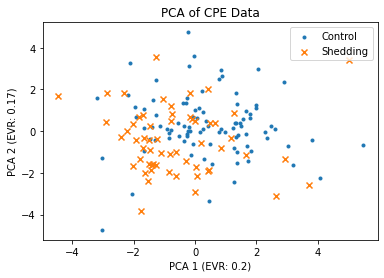

In [7]:
pipeline = Pipeline([ ('pca', PCA(n_components=2))])

pca_data = pipeline.fit_transform(pw_expr_cpe)
plt.scatter(pca_data[~labels,0], pca_data[~labels,1], label = 'Control', marker = '.')
plt.scatter(pca_data[labels,0], pca_data[labels,1], label = 'Shedding', marker = 'x')

evr1 = round(pipeline['pca'].explained_variance_ratio_[0],2)
evr2 = round(pipeline['pca'].explained_variance_ratio_[1],2)

plt.xlabel(f'PCA 1 (EVR: {evr1})')
plt.ylabel(f'PCA 2 (EVR: {evr2})')
plt.legend()
plt.title('PCA of CPE Data')

Rank the pathways using a random featureset. This is the algorithm CePa with the chosen network and centrality types. 

See https://academic.oup.com/bioinformatics/article/29/5/658/251837 for details and the R implementation.

In [8]:
random_featureset = np.random.choice(np.array(ds.columns), 1000, replace = False)
clpe.simple_transform(random_featureset, n_null_trials = 100)

,pathway,score,p_val
0,R-HSA-3560783,0.051282,0.08
1,R-HSA-1855183,0.000000,0.12
2,R-HSA-1227990,0.045213,0.41
3,R-HSA-5693537,0.048362,0.39
4,R-HSA-1660661,0.000000,0.35
...,...,...,...
70,R-HSA-264876,0.000000,0.56
71,R-HSA-9027284,0.067742,0.28
72,R-HSA-447041,0.000000,0.67
73,R-HSA-3595177,0.025000,0.25


## Compute LPE (Linear Pathway Expression)

In [9]:
lpe = GLPE.LPE(feature_ids = list(ds.columns),
               pathway_files = '../data/pw_edge_mtx',
               normalize_rows = True)

Generate LPE

In [10]:
lpe_pipeline = Pipeline([('scaling', StandardScaler()), ('lpe', lpe)])

lpe_pipeline.fit(np.array(ds))

Pipeline(steps=[('scaling', StandardScaler()),
                ('lpe',
                 LPE(feature_ids=['1007_s_at', '1053_at', '117_at', '121_at',
                                  '1255_g_at', '1294_at', '1316_at', '1320_at',
                                  '1405_i_at', '1431_at', '1438_at', '1487_at',
                                  '1494_f_at', '1598_g_at', '160020_at',
                                  '1729_at', '177_at', '1773_at', '179_at',
                                  '1861_at', '200000_s_at', '200001_at',
                                  '200002_at', '200003_s_at', '200004_at',
                                  '200005_at', '200006_at', '200007_at',
                                  '200008_s_at', '200009_at', ...],
                     pathway_files='../data/pw_edge_mtx',
                     pathway_transition_matrix=<75x22277 sparse matrix of type '<class 'numpy.float64'>'
	with 3259 stored elements in Compressed Sparse Row format>))])

In [11]:
pw_expr_lpe = pandas.DataFrame(lpe_pipeline.transform(np.array(ds)), index = ds.index, columns = lpe_pipeline['lpe'].pathway_names_)
pw_expr_lpe.head()

,R-HSA-3560783,R-HSA-1855183,R-HSA-1227990,R-HSA-5693537,R-HSA-1660661,R-HSA-176417,R-HSA-9665686,R-HSA-1462054,R-HSA-8951430,R-HSA-391906,...,R-HSA-8852405,R-HSA-8964011,R-HSA-9632974,R-HSA-1606341,R-HSA-8939211,R-HSA-264876,R-HSA-9027284,R-HSA-447041,R-HSA-3595177,R-HSA-196071
SampleID,,,,,,,,,,,,,,,,,,,,,
GSM1883444,-0.760024,-0.065282,0.047840,0.107743,0.263008,-0.528962,-0.033852,-0.988725,0.173334,-0.156695,...,-0.684698,-0.762812,-0.269162,0.278787,0.070758,0.115035,-0.103307,-0.310861,-0.786261,-0.104323
GSM1883445,0.760024,0.065282,-0.047840,-0.107743,-0.263008,0.528962,0.033852,0.988725,-0.173334,0.156695,...,0.684698,0.762812,0.269162,-0.278787,-0.070758,-0.115035,0.103307,0.310861,0.786261,0.104323
GSM1883463,-0.017175,0.133472,0.109600,-0.004957,0.012792,-0.226369,0.044223,-0.115289,-0.016376,0.607368,...,-0.612502,0.435073,-0.059412,0.238985,0.114649,-0.098366,0.041537,0.103712,-0.187862,0.220281
GSM1883464,0.017175,-0.133472,-0.109600,0.004957,-0.012792,0.226369,-0.044223,0.115289,0.016376,-0.607368,...,0.612502,-0.435073,0.059412,-0.238985,-0.114649,0.098366,-0.041537,-0.103712,0.187862,-0.220281
GSM1883482,-0.175552,-0.023405,0.038062,0.077882,-0.027797,-0.042656,-0.005719,-0.440777,0.126645,-0.167357,...,-0.691050,-0.125490,0.128026,-0.089514,0.023658,0.097774,-0.003852,-0.073797,-0.234984,-0.041728


PCA of LPE data

Text(0.5, 1.0, 'PCA of LPE Data')

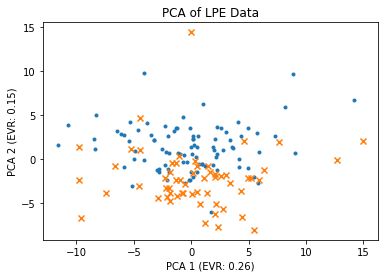

In [12]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])

pca_data = pipeline.fit_transform(pw_expr_lpe)
plt.scatter(pca_data[~labels,0], pca_data[~labels,1], label = 'Control', marker = '.')
plt.scatter(pca_data[labels,0], pca_data[labels,1], label = 'Shedding', marker = 'x')

evr1 = round(pipeline['pca'].explained_variance_ratio_[0],2)
evr2 = round(pipeline['pca'].explained_variance_ratio_[1],2)

plt.xlabel(f'PCA 1 (EVR: {evr1})')
plt.ylabel(f'PCA 2 (EVR: {evr2})')
plt.title('PCA of LPE Data')